1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [ ]:
import pandas as pd

# 读取 CSV 文件
file_path = r"C:\Users\王志鸿\Desktop\导论\open_rank_20236.csv"
df = pd.read_csv(file_path)

# 按 'rank' 列排序，选取前100个排名的项目
df_top100 = df.sort_values(by='rank').head(100)

# 计算 'value' 列的最大值、最小值、均值和中位数
value_max = df_top100['value'].max()
value_min = df_top100['value'].min()
value_mean = df_top100['value'].mean()
value_median = df_top100['value'].median()

# 输出结果
print(f"最大值: {value_max}")
print(f"最小值: {value_min}")
print(f"均值: {value_mean}")
print(f"中位数: {value_median}")


                  item  rank    value  rankDelta  valueDelta
0  home-assistant/core     1  1394.45          0      -23.01
1     microsoft/vscode     2  1334.48          0      -36.42
2        NixOS/nixpkgs     3  1240.31          0       -0.31
3      flutter/flutter     4   886.61          0      -13.74
4      pytorch/pytorch     5   803.78          1        8.29
最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [17]:
import pandas as pd

# 读取CSV文件
file_path = r"C:\Users\王志鸿\Desktop\导论\activity_2022.csv"
df = pd.read_csv(file_path)

# 计算每个项目每月的增长率
growth_rates = []

# 对每一行进行计算
for index, row in df.iterrows():
    repo = row['repo']
    values = row[1:]  # 排除 'repo' 列，取剩余的12个月份的数据
    
    # 计算每月的增长率
    monthly_growth_rate = [(values[i] - values[i-1]) / values[i-1] for i in range(1, len(values))]
    
    # 计算该项目的平均增长率
    avg_growth_rate = sum(monthly_growth_rate) / len(monthly_growth_rate)
    growth_rates.append((repo, avg_growth_rate))

# 转换为 DataFrame，便于查看
growth_rate_df = pd.DataFrame(growth_rates, columns=['repo', 'avg_growth_rate'])

# 按照增长率排序，选择前十名
top_10_growth_rate_df = growth_rate_df.sort_values(by='avg_growth_rate', ascending=False).head(10)

# 输出排名前十的项目及其平均增长率
print("排名前十的项目及其平均增长率:")
print(top_10_growth_rate_df)


排名前十的项目及其平均增长率:
                                     repo  avg_growth_rate
4  firstcontributions/first-contributions         0.140824
7                        microsoft/vscode         0.022905
8                         pytorch/pytorch         0.013160
6                     home-assistant/core         0.008453
1                           NixOS/nixpkgs         0.000295
3                          elastic/kibana        -0.003651
9                          rust-lang/rust        -0.003778
5                         flutter/flutter        -0.012404
0                MicrosoftDocs/azure-docs        -0.017928
2                          dotnet/runtime        -0.022848


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

<Figure size 1600x800 with 0 Axes>

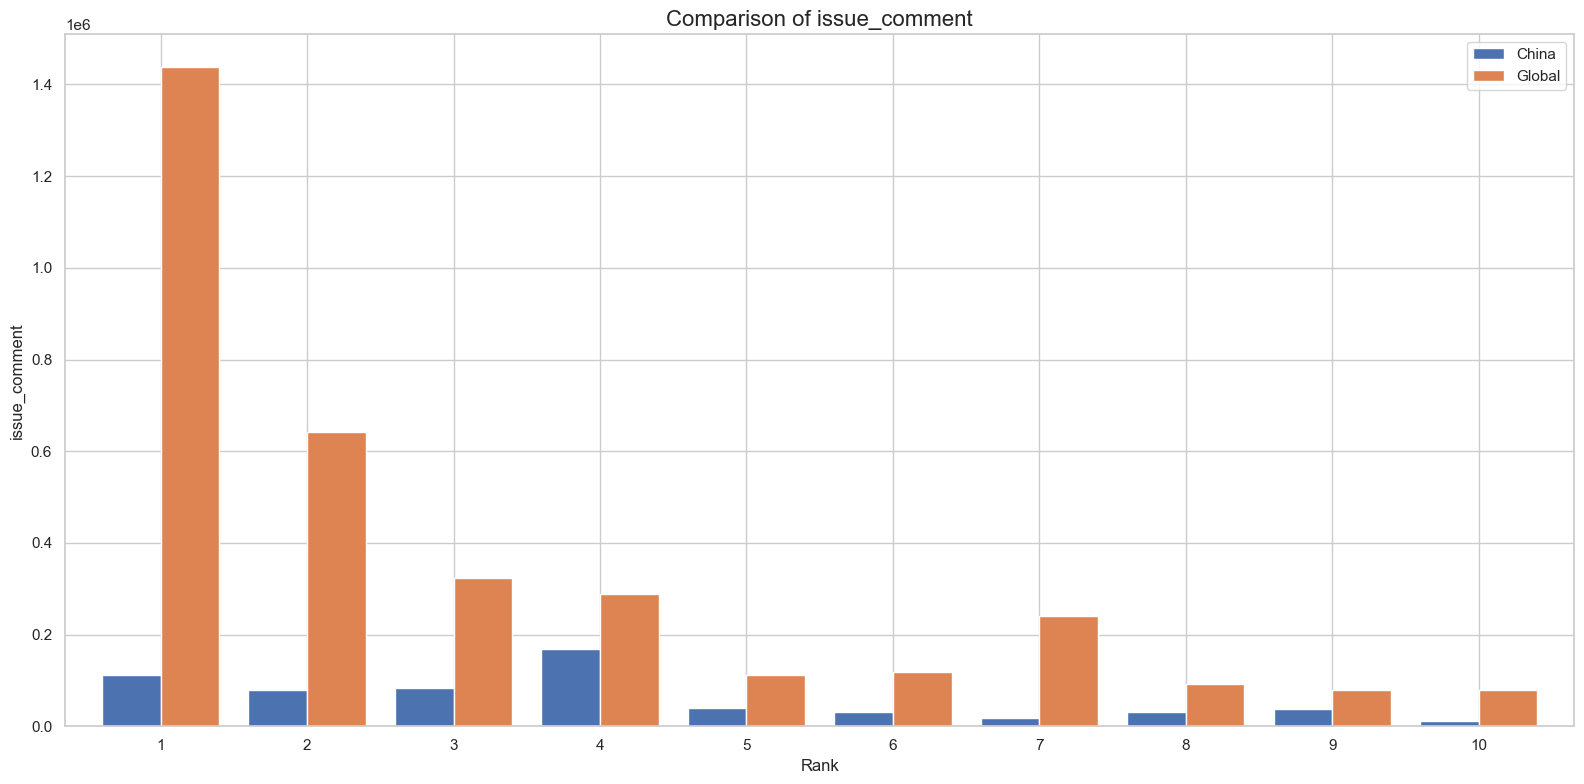

<Figure size 1600x800 with 0 Axes>

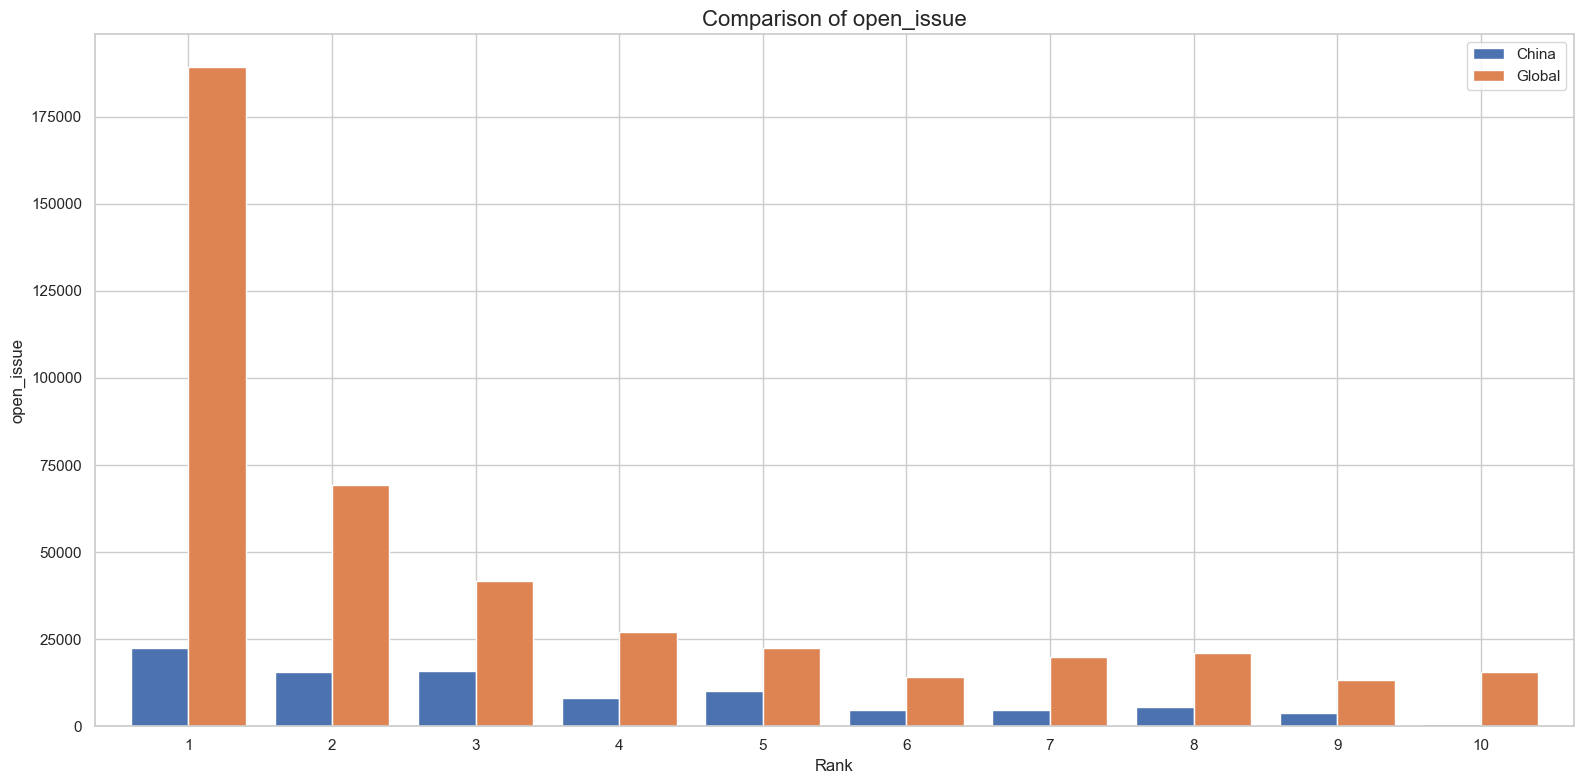

<Figure size 1600x800 with 0 Axes>

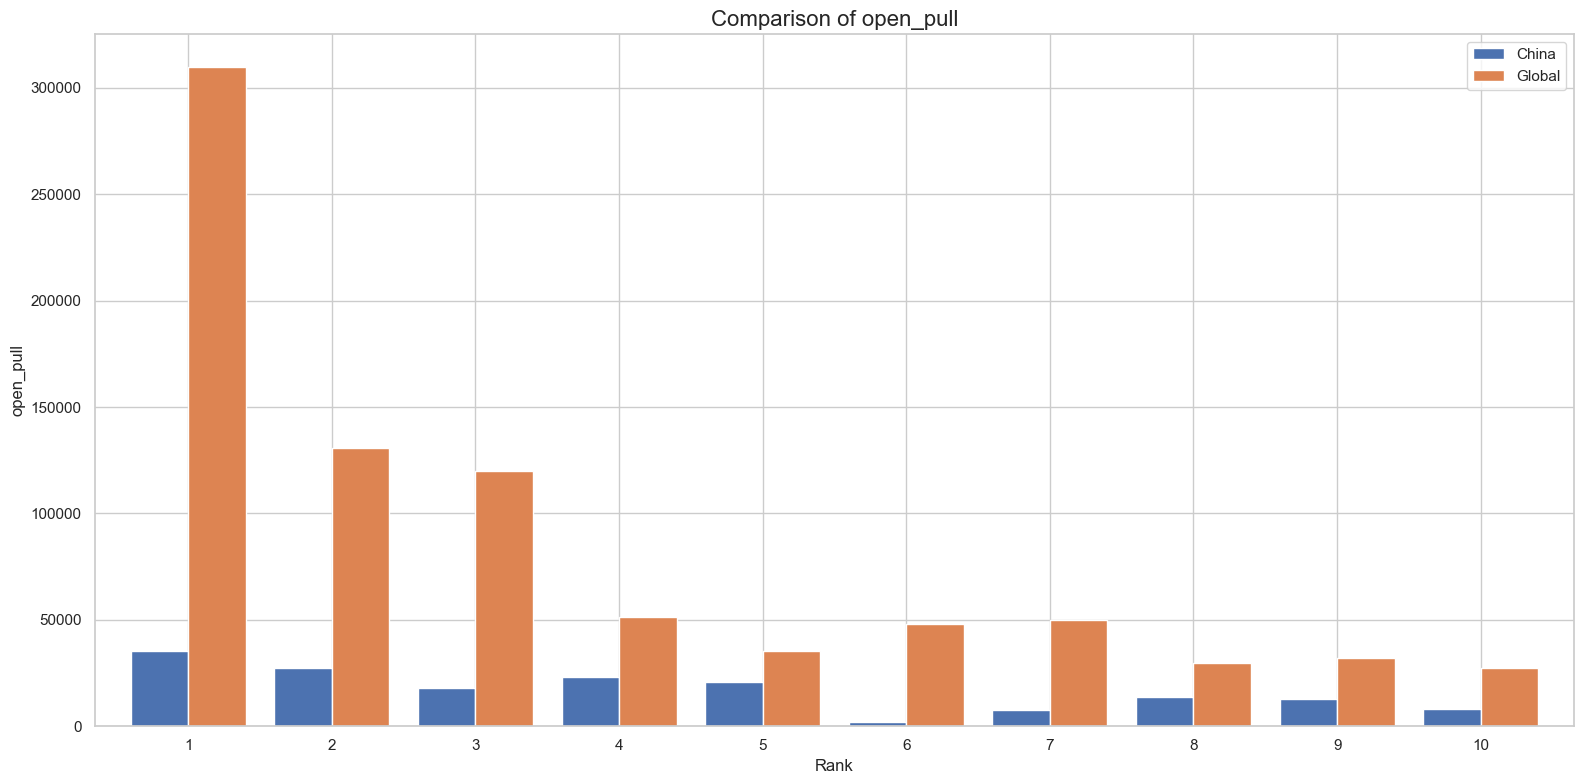

<Figure size 1600x800 with 0 Axes>

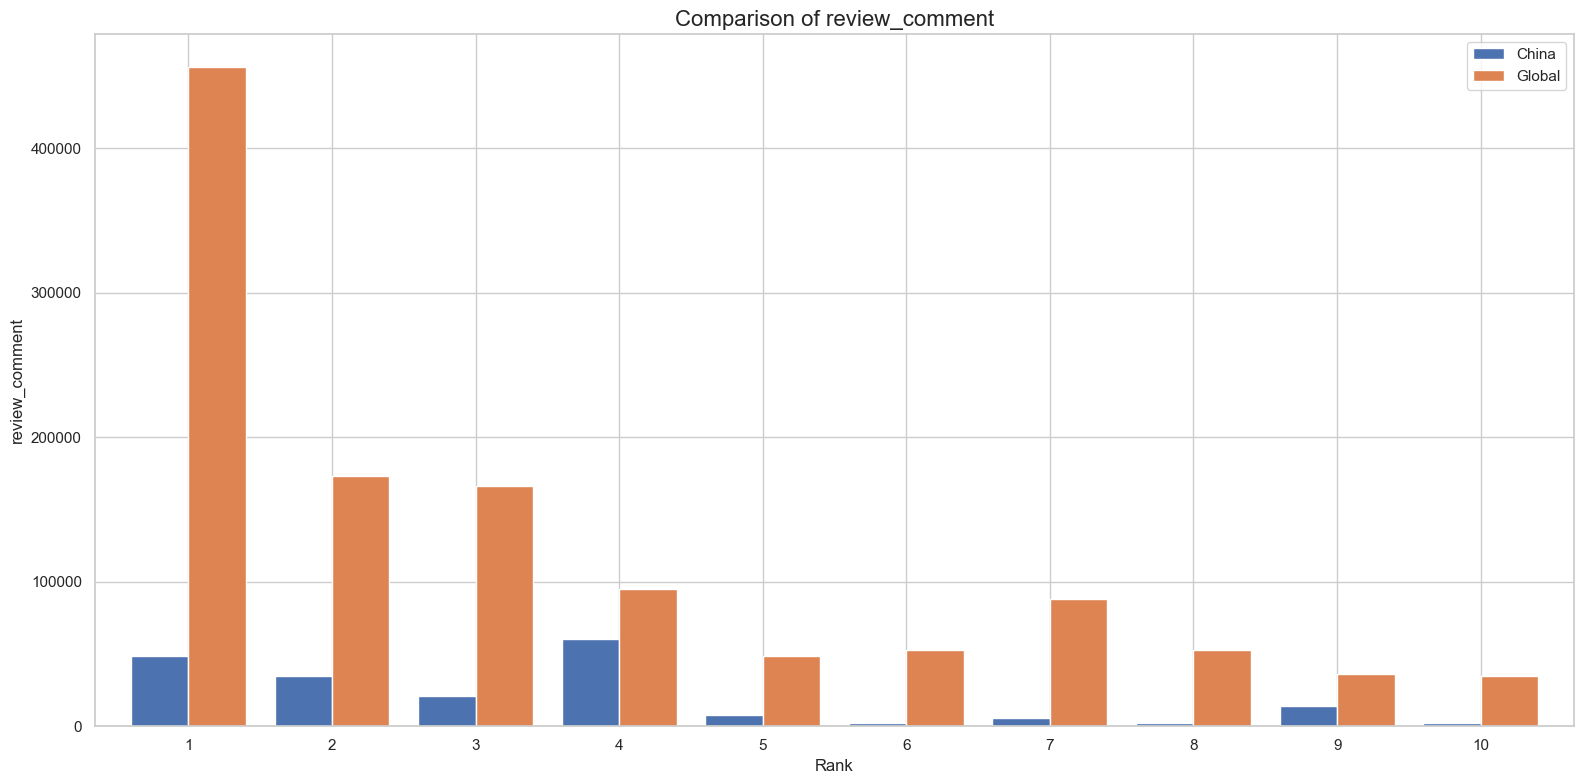

<Figure size 1600x800 with 0 Axes>

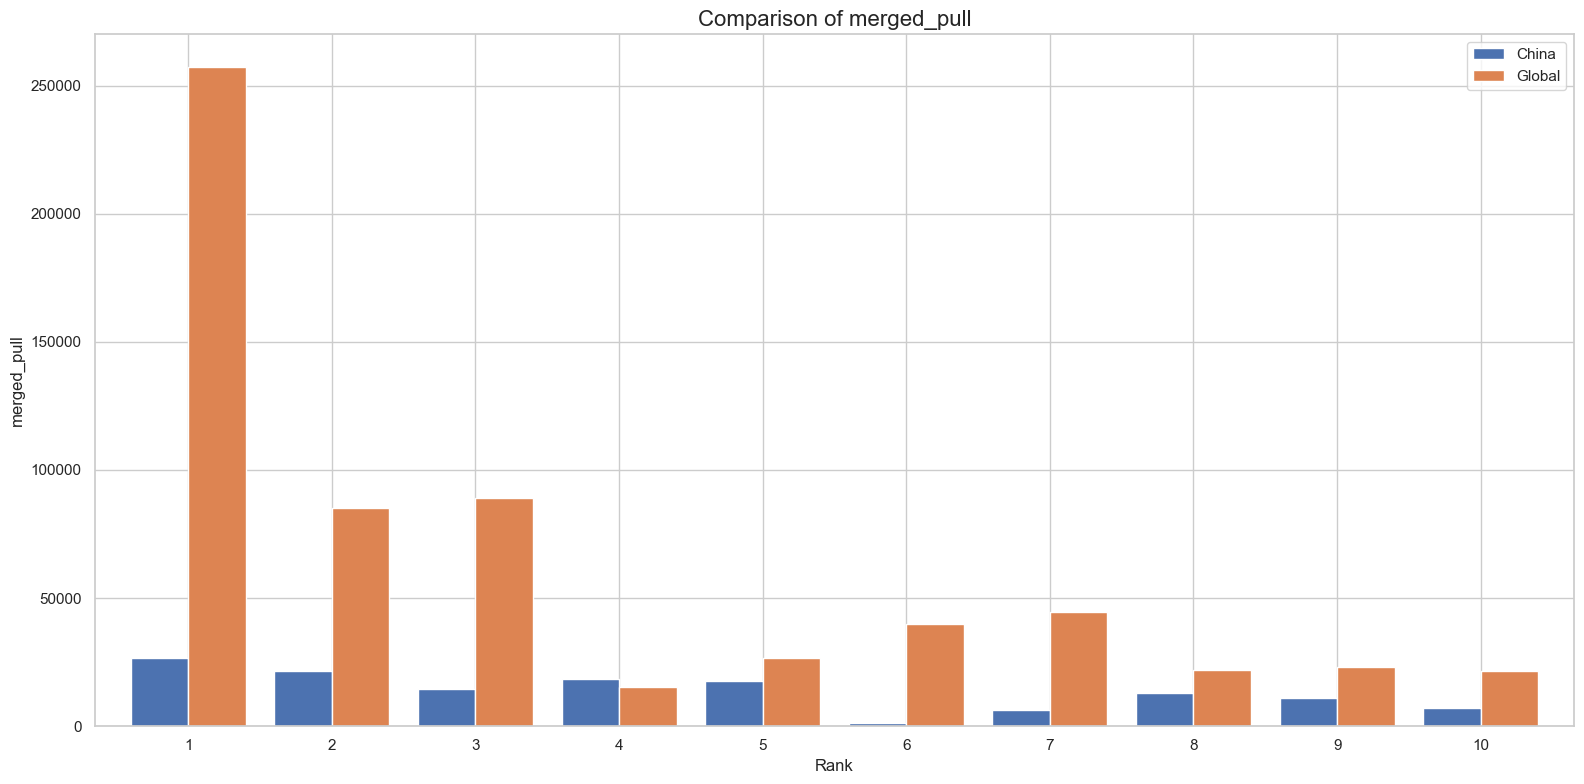

<Figure size 1600x800 with 0 Axes>

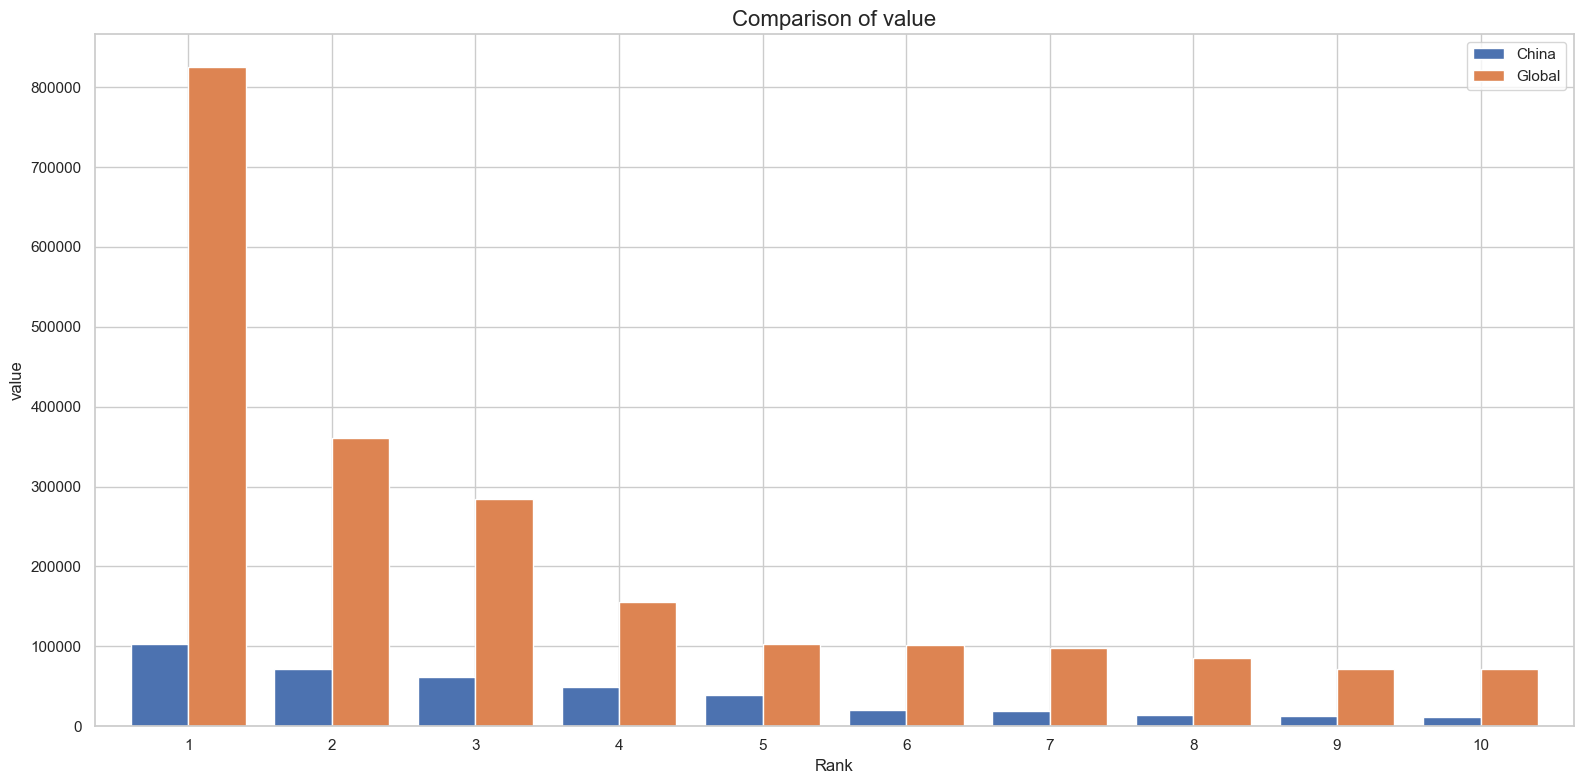

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载 CSV 文件
china_file = r"C:\Users\王志鸿\Desktop\导论\china_2022.csv"
global_file = r"C:\Users\王志鸿\Desktop\导论\global_2022.csv"

china_df = pd.read_csv(china_file)
global_df = pd.read_csv(global_file)

# 将企业按排名排序
china_df = china_df.sort_values(by='rank')
global_df = global_df.sort_values(by='rank')

# 比较指标
metrics = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']

# 设置图形风格
sns.set(style="whitegrid")

# 绘制比较图
def plot_comparison(china_df, global_df, metric):
    # 确保两个数据框有相同长度
    min_len = min(len(china_df), len(global_df))
    china_df = china_df.head(min_len)
    global_df = global_df.head(min_len)

    # 合并数据
    comparison_df = pd.DataFrame({
        'China': china_df[metric],
        'Global': global_df[metric]
    })
    
    # 创建绘图
    plt.figure(figsize=(16, 8))  
    
    # 绘制条形图
    comparison_df.plot(kind='bar', figsize=(16, 8), width=0.8) 
    
    # 设置标题和标签
    plt.title(f'Comparison of {metric}', fontsize=16)
    plt.ylabel(f'{metric}', fontsize=12)
    plt.xlabel('Rank', fontsize=12) 
    
    xticks_labels = range(1, len(comparison_df) + 1)  # 设置X轴标签为企业的rank
        
    plt.xticks(range(len(comparison_df)), xticks_labels, rotation=0) 

    # 调整X轴标签间距
    plt.tight_layout()  # 自动调整布局，避免标签被遮挡
    
    # 显示图像
    plt.show()

# 绘制每个指标的对比图
for metric in metrics:
    plot_comparison(china_df, global_df, metric)


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

#### 贝叶斯定理的形式是：

$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

其中：

    ( P(A|B) ) 是在事件 B 已经发生的情况下，事件 A 发生的概率。
    ( P(B|A) ) 是在事件 A 已经发生的情况下，事件 B 发生的概率。
    ( P(A) ) 是事件 A 发生的先验概率。
    ( P(B) ) 是事件 B 发生的总概率。
    
#### 定义：
- 事件 A：项目是 非软件类 项目，也就是内容资源型项目。
- 事件 B：项目 带有 HTML/Markdown 标签。

给定项目带有 HTML/Markdown 标签，项目是非软件类的概率  $P(\text{非软件类}|\text{HTML/Markdown}) $。

#### 根据题目中的信息：
- 工具组件型项目占比 50%，系统应用型占比 25%，内容资源型占比 25%。

    $P(\text{非软件类}) = 0.25$

- 带 HTML/Markdown 标签 的项目：

    非软件类项目（内容资源型）中，占比 85%。
    
    $P(\text{HTML/Markdown}|\text{非软件类}) = 0.85$

    软件类项目中占比 10%。

    $P(\text{HTML/Markdown}|\text{软件类}) = 0.10$

- 所有项目中带有 HTML/Markdown 标签的概率 $P(\text{HTML/Markdown})$ 可以通过全概率公式计算：$P(\text{HTML/Markdown}) = P(\text{HTML/Markdown}|\text{非软件类}) \cdot P(\text{非软件类}) + P(\text{HTML/Markdown}|\text{软件类}) \cdot P(\text{软件类})$

    其中：
$P(\text{软件类}) = 1 - P(\text{非软件类}) = 0.75$

所以：
- $P(\text{HTML/Markdown}) = (0.85 \times 0.25) + (0.10 \times 0.75)$
- $P(\text{HTML/Markdown}) = 0.2125 + 0.075 = 0.2875$

#### 应用贝叶斯定理：
$P(\text{非软件类}|\text{HTML/Markdown}) = \frac{P(\text{HTML/Markdown}|\text{非软件类}) \cdot P(\text{非软件类})}{P(\text{HTML/Markdown})}$


代入已知数值：

- $P(\text{非软件类}|\text{HTML/Markdown}) = \frac{0.85 \times 0.25}{0.2875}$
- $P(\text{非软件类}|\text{HTML/Markdown}) = \frac{0.2125}{0.2875} \approx 0.738$


#### 结果：
已知一个项目带有 HTML/Markdown 标签时，该项目是 非软件型项目（即内容资源型项目）的概率约为 73.8%。

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

#### 贝叶斯定理：
$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$

其中：

    ( P(A|B) ) 是已知项目是由 JavaScript 编写，项目是工具组件型的概率。
    ( P(B|A) ) 是在项目是工具组件型的情况下，项目由 JavaScript 编写的概率。
    ( P(A) ) 是项目是工具组件型的先验概率。
    ( P(B) ) 是项目由 JavaScript 编写的总概率。
#### 定义：
- 事件 A：项目是 工具组件型项目。
- 事件 B：项目是由 JavaScript 编写的。

给定项目是由 JavaScript 编写的，项目是工具组件型的概率 $P(\text{工具组件型}|\text{JavaScript}) $。




#### 根据题目中的信息：
- 工具组件型项目占比 50%，所以：

    $P(\text{工具组件型}) = 0.50$

- JavaScript 编写的项目在不同类型项目中的分布：

    工具组件型项目中，由 JavaScript 编写的概率为 80%（假设工具组件型项目中，大部分是使用 JavaScript 编写的）。

    $P(\text{JavaScript}|\text{工具组件型}) = 0.80$

    其他类型的项目（如系统应用型和内容资源型）中，JavaScript 编写的比例较低。假设在系统应用型项目中，JavaScript 编写的概率为 20%，在内容资源型项目中，JavaScript 编写的概率为 10%。

        对于系统应用型项目：

    $P(\text{JavaScript}|\text{系统应用型}) = 0.20$

        对于内容资源型项目：
        
    $P(\text{JavaScript}|\text{内容资源型}) = 0.10$
    

- 所有项目中，由 JavaScript 编写的概率 ( P(\text{JavaScript}) ) 可以通过全概率公式计算：

    $P(\text{JavaScript}) = P(\text{JavaScript}|\text{工具组件型}) \cdot P(\text{工具组件型}) + P(\text{JavaScript}|\text{系统应用型}) \cdot P(\text{系统应用型}) + P(\text{JavaScript}|\text{内容资源型}) \cdot P(\text{内容资源型})$

    其中：
    
    $P(\text{系统应用型}) = 0.25$
    
    $P(\text{内容资源型}) = 0.25$

所以：
- $P(\text{JavaScript}) = (0.80 \times 0.50) + (0.20 \times 0.25) + (0.10 \times 0.25)$
- $P(\text{JavaScript}) = 0.40 + 0.05 + 0.025 = 0.475$

#### 应用贝叶斯定理：
根据贝叶斯定理，我们可以计算：

$P(\text{工具组件型}|\text{JavaScript}) = \frac{P(\text{JavaScript}|\text{工具组件型}) \cdot P(\text{工具组件型})}{P(\text{JavaScript})}$


代入已知数值：
- $P(\text{工具组件型}|\text{JavaScript}) = \frac{0.80 \times 0.50}{0.475}$
- $P(\text{工具组件型}|\text{JavaScript}) = \frac{0.40}{0.475} \approx 0.842$


#### 结果：
已知一个项目是由 JavaScript 编写的，那么该项目是 工具组件型项目 的概率约为 84.2%。

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

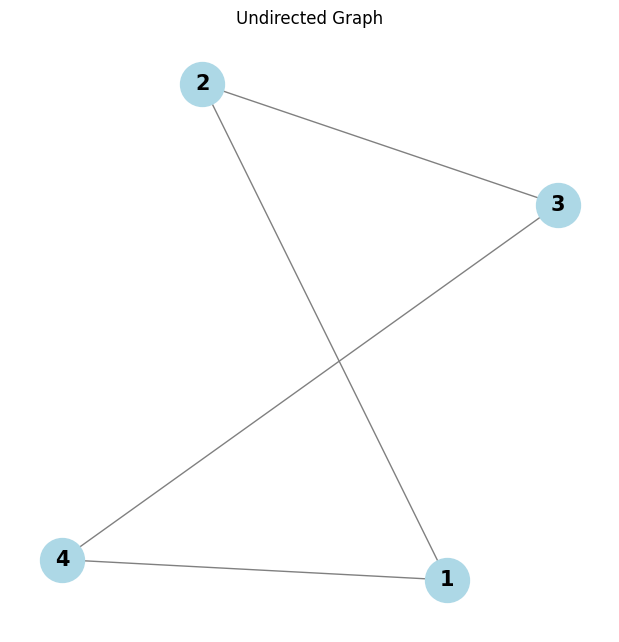

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# 用户节点和边的定义
user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

# 创建无向图
G = nx.Graph()

# 添加节点和边
G.add_nodes_from(user)
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(6, 6))  # 设置图像大小
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', font_size=15, font_weight='bold', edge_color='gray')

# 显示图形
plt.title("Undirected Graph")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

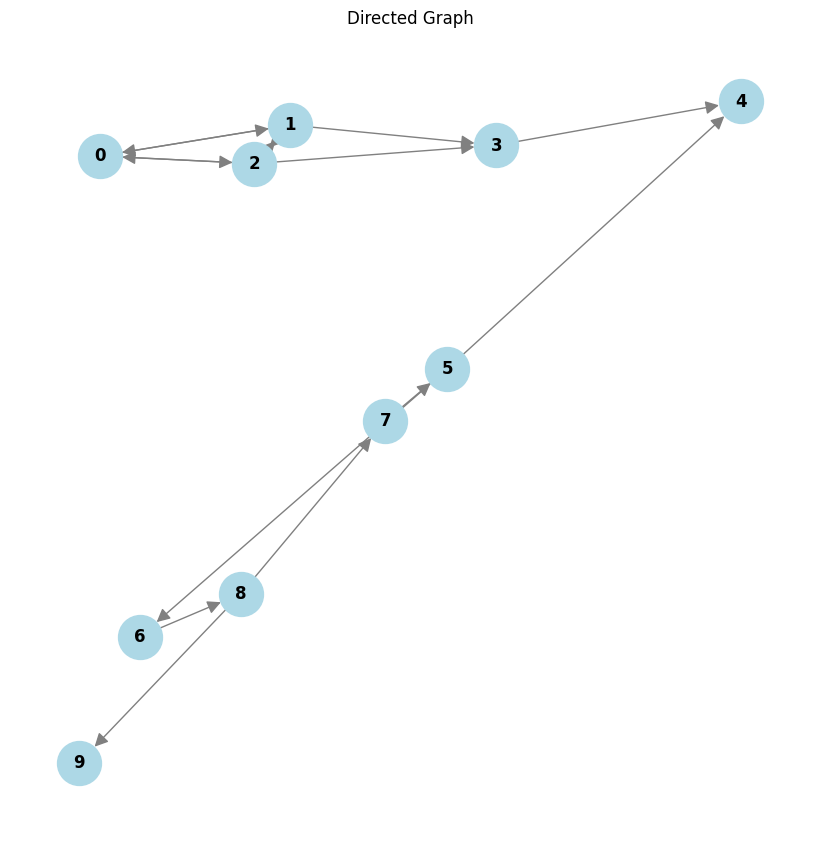

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制有向图
plt.figure(figsize=(8, 8))  # 设置图像的大小
pos = nx.spring_layout(G, seed=42)  # 设置节点位置布局
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', arrowsize=20)

# 显示图形
plt.title("Directed Graph")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


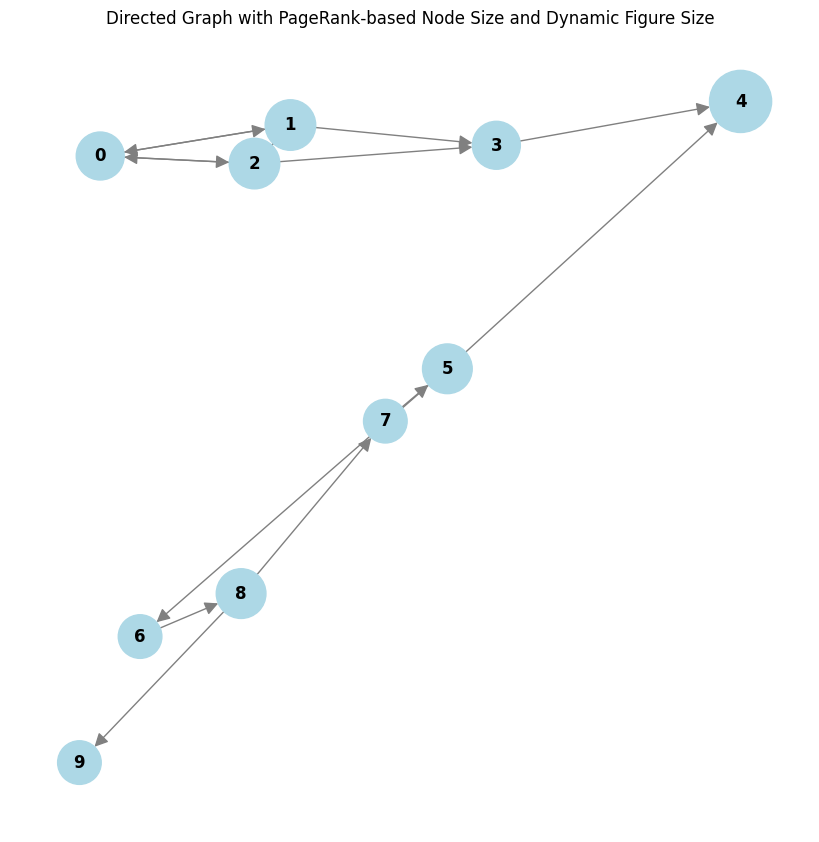

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 定义用户节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
G.add_nodes_from(users)
G.add_edges_from(edges)

# 计算PageRank
pagerank_values = nx.pagerank(G, alpha=0.85)  # alpha是阻尼因子，通常设置为0.85

# 打印PageRank值
print("PageRank values:")
for node, pr_value in pagerank_values.items():
    print(f"Node {node}: {pr_value:.4f}")

# 根据PageRank值调整节点大小，PageRank值越大，节点越大
max_pagerank = max(pagerank_values.values())
node_size = [pagerank_values[node] / max_pagerank * 2000 for node in G.nodes()]

# 根据最大节点大小调整整体图的大小
# 设置图形大小，根据最大节点大小动态调整
fig_size = max(8, len(G.nodes()) / 2)  # 图形大小依据节点数量动态调整

# 绘制有向图
plt.figure(figsize=(fig_size, fig_size))  # 设置图像的大小
pos = nx.spring_layout(G, seed=42)  # 设置节点位置布局
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray', arrowsize=20)

# 显示图形
plt.title("Directed Graph with PageRank-based Node Size and Dynamic Figure Size")
plt.show()
